#**Detecting Fraudulent Data Using PCA**

In this assignment, I am using Principal Component Analysis (PCA) to detect patterns in the "Credit Card Fraud Detection" dataset that help in distinguishing fraudulent transactions from non-fraudulent ones.

Principal Component Analysis is a technique used to reduce the dimensionality of data while preserving the most important information. PCA transforms a set of correlated variables into a set of linearly uncorrelated variables called principal components.



## **Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from typing import Tuple
import seaborn as sns

# **1. Data Preprocessing**

**Loading dataset**

I am using [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)dataset from Kaggle, which includes a total of 284,807 transactions, out of which 492 are fraud transactions. The dataset is highly unbalanced, as fraud transactions account for approximately 0.17% of all transactions.

This function **load_data**() loads a dataset stored in a CSV file (creditcard.csv) located at the specified file_path using pandas, and returns it as a pandas DataFrame (pd.DataFrame).

In [ ]:
 # Loading and reading the datset
def load_data(file_path: str) -> pd.DataFrame:
    """
    Load the dataset from a CSV(creditcard.csv) file.

    Parameters:
        file_path (str): The file path of the CSV file.

    Returns:
        pd.DataFrame: The loaded dataset as a DataFrame.
    """
    return pd.read_csv(file_path)

data_path = "/content/drive/MyDrive/DATA/CS5369L/creditcard.csv"
data = load_data(data_path)

**Perform initial exploratory data analysis (EDA)**


The input file contains total 31 columns out of which the Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

View the data

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Shape of the data

In [ ]:
data.shape

(284807, 31)

Concise summary of the DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Generating descriptive statistics of data

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Check for missing values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Column present in input file

In [ ]:
data.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

Displaying total number of Non-Fraudulent and Fraudulent transactions


In [ ]:
class_counts = data['Class'].value_counts()

print(f"Class 0 - Number of Non-Fraudulent transactions: {class_counts[0]}")
print(f"Class 1 - Number of Fraudulent transactions: {class_counts[1]}")

print('No-Fraud transactions are', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud transactions', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Class 0 - Number of Non-Fraudulent transactions: 284315
Class 1 - Number of Fraudulent transactions: 492
No-Fraud transactions are 99.83 % of the dataset
Fraud transactions 0.17 % of the dataset


**Visually compare the distributions of fraudulent and non-fraudulent transactions**

This visualization is important for initial data exploration and setting the stage for more detailed analysis and modeling in fraud detection tasks.

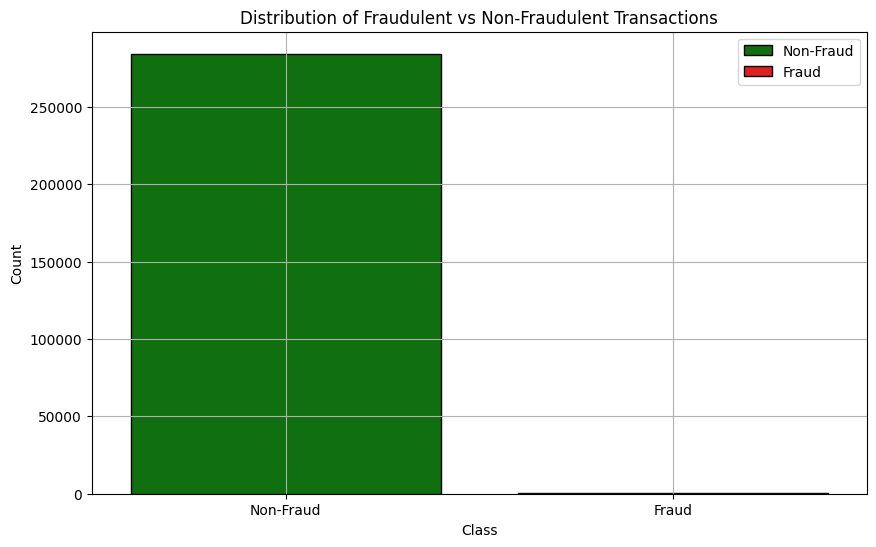

In [ ]:
def plot_fraud_distribution(df: pd.DataFrame) -> None:
  """
  Plot the distribution of fraudulent vs non-fraudulent transactions.

  Parameters:
      df (pd.DataFrame): DataFrame containing the dataset.
  """
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Class', data=df, hue='Class', palette=['green', 'red'], edgecolor='black')
  plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
  plt.grid(True)
  plt.legend(['Non-Fraud', 'Fraud'])
  plt.show()
plot_fraud_distribution(data)

**Observation** - There are less number of fraud transactions as compared to non-fraud transactions.

**Visually compare the distributions of transaction amounts between fraudulent and non-fraudulent transactions**

Density refers to how data points are distributed across the range of values in a dataset

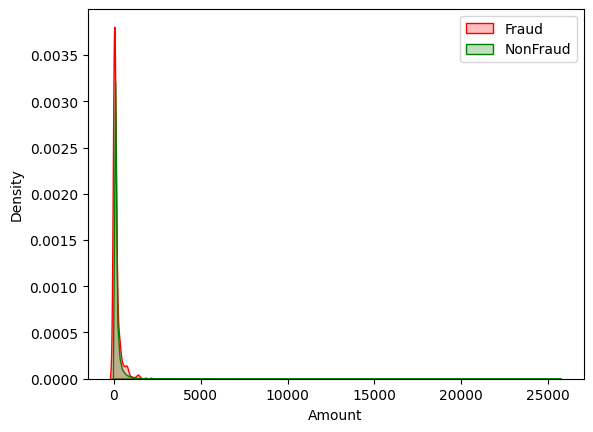

In [ ]:
# Plot KDE (Kernel Density Estimate) for fraudulent transactions (Class == 1)
sns.kdeplot(data.Amount[data.Class == 1], label='Fraud', fill=True, color='red')

# Plot KDE for non-fraudulent transactions (Class == 0)
sns.kdeplot(data.Amount[data.Class == 0], label='NonFraud', fill=True, color='green')

# Set x-axis label
plt.xlabel('Amount')

# Display legend
plt.legend()

# Show plot
plt.show()


**Observation** - There are lot more instances of small fraud amounts than really large ones

**Visually compare the distributions of transaction time between fraudulent and non-fraudulent transactions**

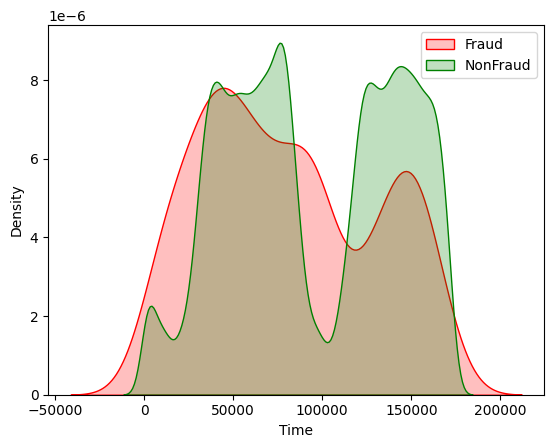

In [ ]:
# Plot KDE (Kernel Density Estimate) for fraudulent transactions (Class == 1)
sns.kdeplot(data.Time[data.Class == 1], label='Fraud', fill=True,color='red')

# Plot KDE for non-fraudulent transactions (Class == 0)
sns.kdeplot(data.Time[data.Class == 0], label='NonFraud', fill=True,color='green')

# Set x-axis label
plt.xlabel('Time')

# Display legend
plt.legend()

# Show plot
plt.show()

**Observation** - It looks like feature time doesn't have an impact in the frequency of frauds. So we can ignore "Time" feature while applying PCA.

**Visual representation the correlation matrix of the dataset (Features)**

A correlation matrix helps in understanding the relationships between different features in the dataset. For example, It can help to select features that are most correlated with the target variable.

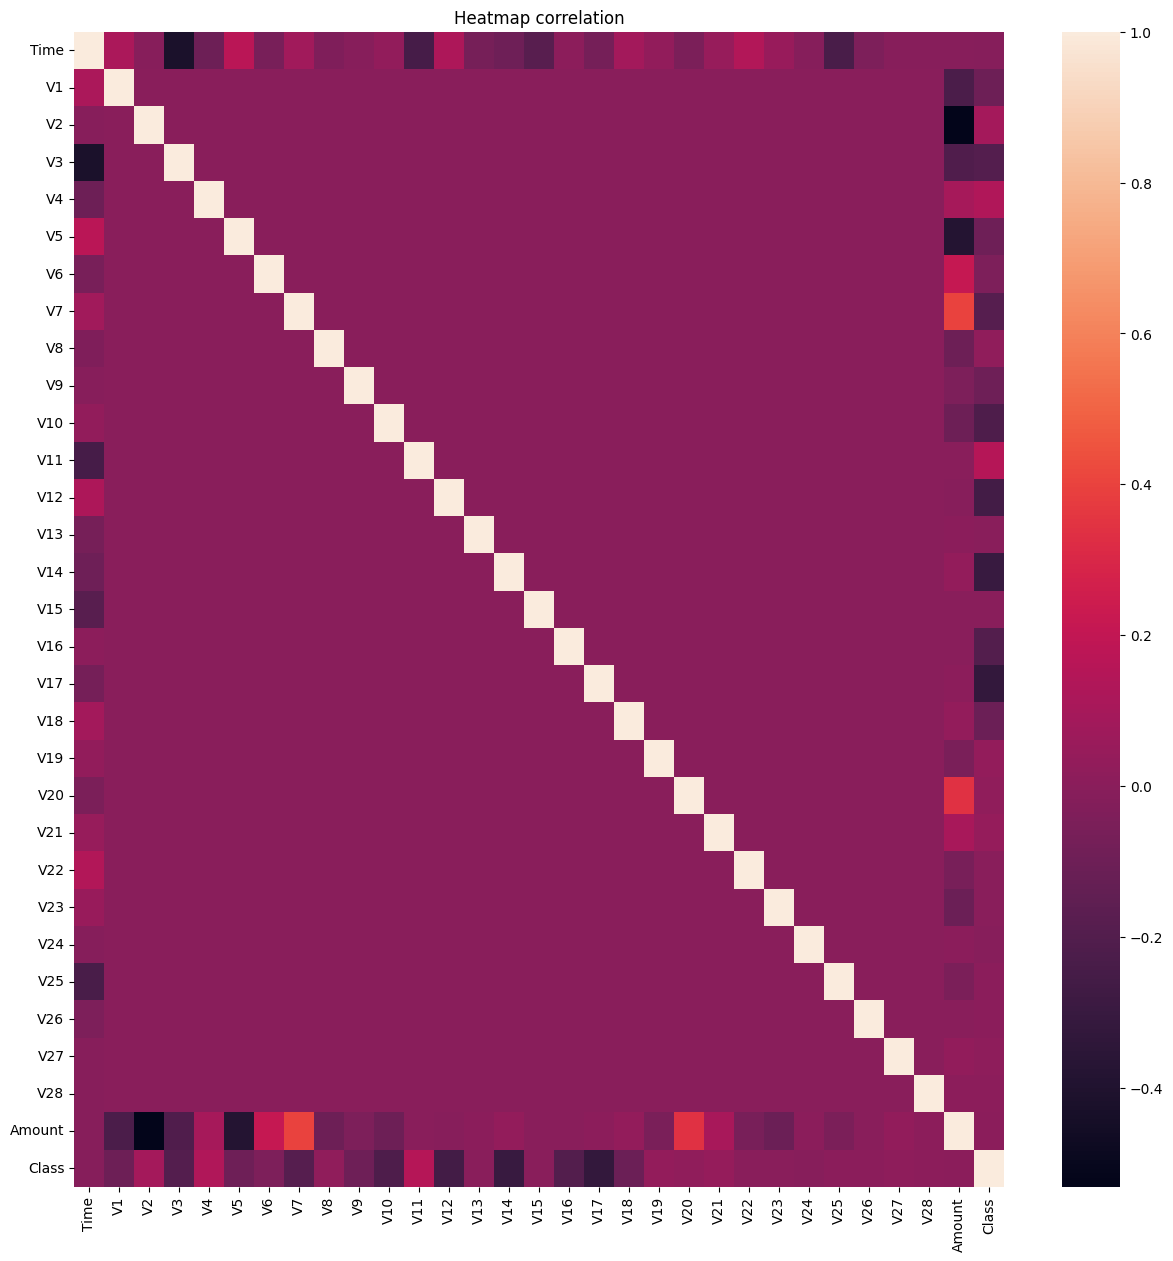

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr()) # Displaying the Heatmap

plt.title('Heatmap correlation')
plt.show()

**Observation** - Looks like most of the features are not correlated with each other

**Normalize the features**
    
Steps
1. Check for null values in the dataset and handle them if there are any.
2. Removing irrelevant columns ('Time')
3. Separating features and target
4. Standardizing the features to ensure all variables are on a similar scale to improve the performance

In [ ]:
 # Data pre-processing

def preprocess_data(data: pd.DataFrame) -> Tuple[np.ndarray,np.ndarray, np.ndarray]:
    """
    Preprocess the dataset by separating features and target, and normalizing the features.

    Parameters:
        data (pd.DataFrame): The input dataset.

    Returns:
        Tuple[np.ndarray,np.ndarray, np.ndarray]: A tuple containing the features,normalized features and target variable.
    """

    # Check for null values in the dataset
    if data.isnull().any().any():
        # Handle null values-> Drop rows with null values
        data = data.dropna()

    # Drop the 'Time' feature beacuse time doesn't have an impact in the frequency of frauds
    data = data.drop('Time', axis=1)

    #separating features and target

    # features -> Extracts all columns except 'Class'
    X = data.drop('Class', axis=1)

    # target variables -> Extracts the 'Class' column as the target variable
    y = data['Class']

    #normalizing the features -> Normalization involves transforming data such that its distribution has a mean of 0 and a standard deviation of 1.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f'X_scaled {X_scaled.shape}')
    print(f'Y {y.shape}')
    return X,X_scaled, y

X,X_scaled, y = preprocess_data(data)

X_scaled (284807, 29)
Y (284807,)


# **2. Apply PCA**

The **apply_pca**() performs Principal Component Analysis on scaled input features (X_scaled) and returns several outputs related to PCA analysis.

Steps
1. Initialize a PCA object to set up the PCA algorithm with default parameters.
2. Use pca.fit_transform(X_scaled) to fit the PCA model to the scaled input features.
3. Compute explained_variance_ratio to provide the variance explained by each of the principal components.
4. Calculate cumulative_variance_ratio to show the cumulative sum of explained variances, indicating how much of the total variance is explained as you add more principal components.
5. Find appropriate number of principle components.
(cumulative_variance_ratio >= 0.95) + 1. This determines the number of principal components needed to explain at least 95% of the variance in the data.
6. Reduce the dimensionality of the data to n_components(appropriate number of principle components). This contains the transformed data with reduced dimensions based on the selected principal components.



In [ ]:
def apply_pca(X,X_scaled: np.ndarray) -> Tuple[np.ndarray, int, np.ndarray, np.ndarray,PCA]:
    """
    Apply PCA to the scaled features and choose the number of principal components.

    Parameters:
        X_scaled (np.ndarray): The scaled input features.

    Returns:
        Tuple[np.ndarray, int]: The transformed data using the chosen number of principal components,
              the number of principal components chosen, explained_variance_ratio and cumulative_variance_ratio and
              PCA object containing components and explained variance
    """
    # number of components = number of features(29)
    pca = PCA()
    # Fit and transform the data
    X_pca = pca.fit_transform(X_scaled)
    print(f'X_pca.shape{X_pca.shape}')
    #X_pca contains the transformed data, where each row represents a transaction and each column represents a principal component.
    #print(f'X_pca{X_pca}')

    # Calculate the explained variance ratio
    #each principal component explains a certain percentage of the variance in your data
    #shape(29,1)
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f'explained_variance_ratio - {explained_variance_ratio}')

    #determine how many principal components are needed to explain a sufficient amount of the total variance
    #The cumulative_variance_ratio is calculated as:
    #Example ->
      #After PC1: 70% (0.70)
      #After PC2: 70% + 20% = 90% (0.90)
      #After PC3: 70% + 20% + 10% = 100% (1.00)

    #shape(29,1)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    print(f'cumulative_variance_ratio - {cumulative_variance_ratio}')

    ## Determine the number of principal components to explain at least 95% of the variance
    n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    print(f"Number of principal components chosen: {n_components}")

    # Reduce dimensionality to the chosen number of principal components
    X_reduced = X_pca[:, :n_components]
    print(f'X_reduced.shape - {X_reduced.shape}')
    #print(f'X_reduced - {X_reduced}')

    return X_reduced, n_components, explained_variance_ratio, cumulative_variance_ratio,pca
X_reduced, n_components, explained_variance_ratio, cumulative_variance_ratio,pca = apply_pca(X,X_scaled)

X_pca.shape(284807, 29)
explained_variance_ratio - [0.06751182 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.0014537 ]
cumulative_variance_ratio - [0.06751182 0.10199458 0.13647734 0.1709601  0.20544285 0.23992561
 0.27440837 0.30889113 0.34337389 0.37785665 0.41233941 0.44682216
 0.48130492 0.51578768 0.55027044 0.5847532  0.61923596 0.65371872
 0.68820147 0.72268423 0.75716699 0.79164975 0.82613251 0.86061527
 0.89509803 0.92958079 0.96406354 0.9985463  1.        ]
Number of principal components chosen: 27
X_reduced.shape - (284807, 27)


# **3. Analyzing PCA Results**

**Analyze component loadings**

The below code provides a structured way to examine how the original features contribute to each principal component extracted by PCA. It's an important step in PCA analysis for understanding feature importance and reducing dimensionality while preserving as much information (variance) as possible.

Positive sign means the feature positively correlates with that principal component.

Negative sign means the feature negatively correlates with that principal component.


In [ ]:
component_loadings = pd.DataFrame(
    # Transpose and limit to n_components
    pca.components_.T[:, :n_components],
    # Column names for PCs
    columns=[f'PC{i+1}' for i in range(n_components)],
    # Feature names as index
    index=X.columns
)

# Print component loadings
print("Component Loadings:")
print(component_loadings)

Component Loadings:
             PC1           PC2            PC3           PC4           PC5  \
V1     -0.168101  1.824584e-29 -4.925402e-158 -0.000000e+00 -0.000000e+00   
V2     -0.392301  4.464265e-02  -3.615826e-02 -1.607227e-01  1.443885e-01   
V3     -0.155678 -7.683558e-02  -2.891351e-02  5.063444e-02  5.640102e-02   
V4      0.072887  1.716673e-02   1.115464e-01 -3.421036e-01  8.317619e-02   
V5     -0.285219  4.244093e-02  -1.719069e-01  8.175783e-02 -4.066804e-01   
V6      0.159443 -7.262571e-02  -3.268418e-01 -8.903043e-02  3.546912e-02   
V7      0.293306 -3.247381e-02   5.705346e-02  5.481460e-03 -1.456157e-01   
V8     -0.076096 -2.538324e-02  -9.327858e-02 -2.872213e-01  3.487367e-01   
V9     -0.032663  4.992944e-02   1.323521e-01  5.363956e-03  2.490589e-01   
V10    -0.074932 -6.933395e-02   1.199500e-01 -1.960938e-01 -4.583503e-02   
V11     0.000077  3.361915e-02  -1.794925e-01  1.843314e-02  2.825490e-01   
V12    -0.007044 -6.644841e-01   1.292897e-02  1.866821e

**Feature importance based on PCA**

This code effectively visualizes the top 10 most important features based on their contributions to the principal components that explain 95% of the variance in the data.

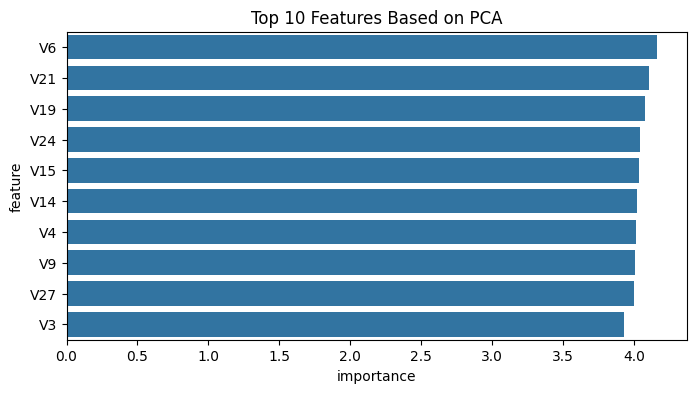

In [ ]:
#Taking the absolute value of principle components and taking sum of these absolute values across all selected components for each feature.
feature_importance = np.abs(pca.components_[:n_components]).sum(axis=0)

#normalizing the feature importance scores to percentages.
feature_importance = 100 * feature_importance / feature_importance.sum()

feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Based on PCA')
plt.show()

**Observation** - V6,V21,V19,V24,V15,V14,V4,V9,V27, and V3 features are contributing more to pca

**Plot cumulative explained variance ratio**

Showing how many principal components are needed to explain a sufficient amount of the total variance

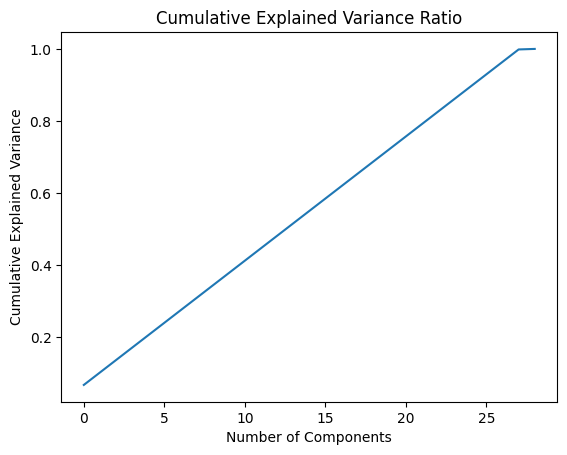

In [ ]:
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()


**Explained variance graph**

Each bar's height indicates the amount of variance explained by that particular principal component. Higher bars indicate more important components in terms of variance explained.

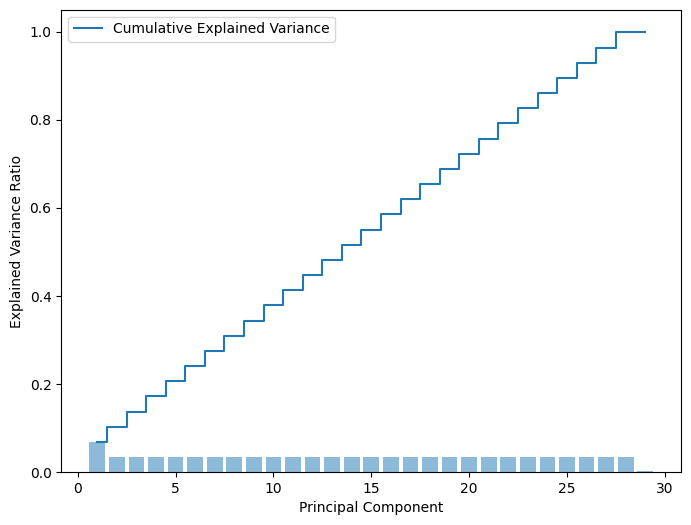

In [ ]:
def plot_explained_variance(explained_variance_ratio: np.ndarray, cumulative_variance_ratio: np.ndarray):
  """
  Plot the explained variance ratio and cumulative explained variance ratio.

  Parameters:
      explained_variance_ratio (np.ndarray): The explained variance ratio for each principal component.
      cumulative_variance_ratio (np.ndarray): The cumulative explained variance ratio.
  """
  plt.figure(figsize=(8, 6))
  plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
  plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance')
  plt.xlabel('Principal Component')
  plt.ylabel('Explained Variance Ratio')
  plt.legend(loc='best')
  plt.show()
plot_explained_variance(explained_variance_ratio,cumulative_variance_ratio)

**Observation:** PC1 is more important component

# **4. Visualization**

Creating a **2D scatter** plot of data points projected onto the first two principal components (PC1 and PC2) obtained from PCA

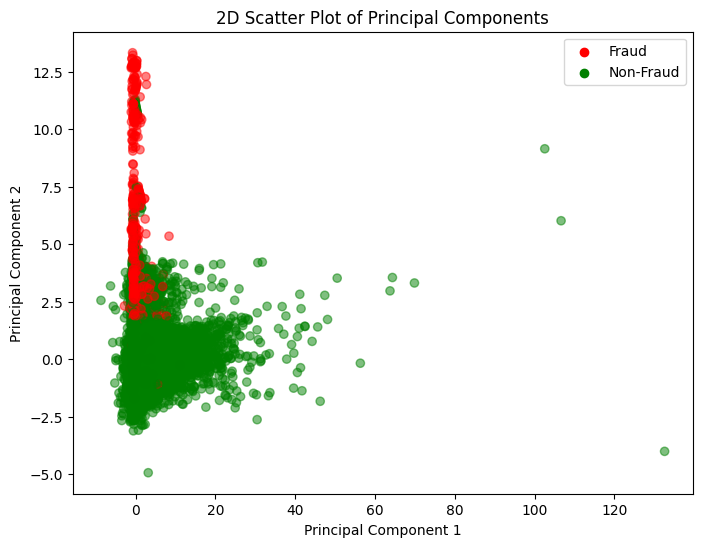

In [ ]:
def plot_scatter_2d(X_reduced: np.ndarray, y: pd.Series):
  """
  Create a 2D scatter plot of the first two principal components.

  Parameters:
      X_reduced (np.ndarray): The transformed data using the chosen number of principal components.
      y (pd.Series): The target variable i.e Class (fraudulent or non-fraudulent transactions).
  """
  if X_reduced.shape[1] < 2:
      raise ValueError("To create a 2D scatter plot of principal components, the transformed data must have at least 2 principal components.")
  plt.figure(figsize=(8, 6))
  colors = np.where(y == 1, 'r', 'g')  # Assign red color for fraud, green for non-fraud
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('2D Scatter Plot of Principal Components')

  # Create a custom legend
  fraud_patch = plt.scatter([], [], c='r', label='Fraud')
  non_fraud_patch = plt.scatter([], [], c='g', label='Non-Fraud')
  plt.legend(handles=[fraud_patch, non_fraud_patch])

  plt.show()
plot_scatter_2d(X_reduced,y)

This 2D scatter plot provides the way to explore and understand how data points are distributed in a 2D space defined by the first two principal components of PCA.

Creating a **3D scatter** plot of data points projected onto the first three principal components (PC1, PC2, and PC3) obtained from PCA

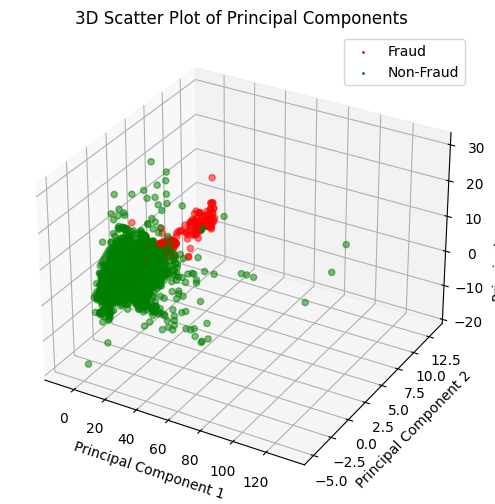

In [ ]:
def plot_scatter_3d(X_reduced: np.ndarray, y: pd.Series):
  """
  Create a 3D scatter plot of the first three principal components.

  Parameters:
      X_reduced (np.ndarray): The transformed data using the chosen number of principal components.
      y (pd.Series): The target variable (fraudulent or non-fraudulent transactions).
  """
  if X_reduced.shape[1] < 3:
      raise ValueError("To create a 3D scatter plot of principal components, the transformed data must have at least 3 principal components.")
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')

  colors = np.where(y == 1, 'r', 'g')  # Assign red color for fraud, green for non-fraud

  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=colors, alpha=0.5)
  ax.set_xlabel('Principal Component 1')
  ax.set_ylabel('Principal Component 2')
  ax.set_zlabel('Principal Component 3')
  ax.set_title('3D Scatter Plot of Principal Components')

  # Create a custom legend
  fraud_patch = plt.scatter([], [], [], c='r', label='Fraud')
  non_fraud_patch = plt.scatter([], [], [], c='g', label='Non-Fraud')
  ax.legend(handles=[fraud_patch, non_fraud_patch])

  plt.show()
plot_scatter_3d(X_reduced,y)

This 3D scatter plot provides a visual representation of how data points are distributed in a 3D space defined by the first three principal components of PCA.

# **5. Insights and Interpretation**

1. The dataset is highly imbalanced. It includes a total of 284,807 transactions, out of which 492 are fraud transactions. The dataset is highly unbalanced, as fraud transactions account for approximately 0.17% of all transactions.
2. In the given dataset, from 'amount' feature we can see that there are lot more instances of small fraud amounts than really large ones so this feature can be helpful in detecting fraud transactions.
3. 'Time' feature doesn't have an impact in the frequency of frauds. So I have  ignored "Time" feature while applying PCA.
4. From the corelation matrix we can see that most of the features are not correlated with each other.
5. To determine the appropriate number of principal components, I aim to select enough components so that their combined contributions explain at least 95% of all the variability present in the original data.
I got 27 principle components.
6. As 29 features are reduced into 27 principle compments. So I visualize the top 10 most important features which are contributing more to pca are V6,V21,V19,V24,V15,V14,V4,V9,V27, and V3.
7. From the Explained variance graph we can see that PC1 is more important  in terms of explaining a larger portion of the variance.

# **Report**
**Findings and effectiveness of PCA in detecting fraudulent transactions**

**When**

**1. Number of principle components= 2**

    Account feature contributes more to pca

    cumulative variance is 0.10199345 which indicates the total variance explained by those components is equal to 0.10199345 which is very less.

**2. Number of principle components= 15**

    Account feature contributes more to pca

    cumulative variance is 0.55026 which indicates the total variance explained by those components is equal to 0.55026 which is also less.

**3. Number of principle components= 27**

    V6 feature contributes more to pca

    cumulative variance is 0.96406354 which indicates the total variance explained by those components is equal to 0.96406354 which covers approximately 95% of variance.

**4. Number of principle components= 29**

    V6 feature contributes more to pca

    cumulative variance is 1 which indicates the total variance explained by those components is equal to 1 which is perfect. These principle components cover total variance in dataset.

From the above findings, to cover total variance of the data we need 29 principle components but if the requirement is to cover atleast 95% variance then we can go with 27 principle components.

**Analysis of the Feature Distribution for identifying the Fraudlent Transactions**
1. **Amount Feature** is one of the most important feature to identify Fradulent Transaction.
2.**Time feature** looks pretty similar across both types of transactions.



**Effectiveness of PCA**

1. Using the PCA we can visualize high-dimensional data in lower dimensions (typically 2 or 3 dimensions). In our case we have total 29 features but using PCA we can reduce the dimensions and show the 2D or 3D scatter plot of fraud and non-fraud transactions.
2. By transforming these 29 features into 27 principal components, PCA retains the most relevant information for detecting fraudulent patterns.
